# Configure environment

In [ ]:
# install required libraries
!pip install -Iv category_encoders==2.2.2
!pip install -Iv matplotlib==3.3.2
!pip install -Iv numpy==1.19.2
!pip install -Iv pandas==1.1.3
!pip install -Iv seaborn==0.11.0
!pip install -Iv sklearn==0.23.2

# Loading our Two Datasets

In [2]:
#Getting the data to a dataframe 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
transaction = pd.read_csv(open('data/transaction.csv', 'rb'))
identity = pd.read_csv(open('data/identity.csv', 'rb'))

In [10]:
#Viewing each dataset
transaction

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,V302,V303,V304
0,2987000,0,86400,68.50,W,13926,0.0,0.0,0.0
1,2987001,0,86401,29.00,W,2755,0.0,0.0,0.0
2,2987002,0,86469,59.00,W,4663,0.0,0.0,0.0
3,2987003,0,86499,50.00,W,18132,0.0,0.0,0.0
4,2987004,0,86506,50.00,H,4497,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...
590535,3577535,0,15811047,49.00,W,6550,0.0,0.0,0.0
590536,3577536,0,15811049,39.50,W,10444,0.0,0.0,0.0
590537,3577537,0,15811079,30.95,W,12037,0.0,0.0,0.0
590538,3577538,0,15811088,117.00,W,7826,0.0,0.0,0.0


In [11]:
identity

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
144228,3577521,-15.0,145955.0,0.0,0.0,0.0,0.0,NaN,NaN
144229,3577526,-5.0,172059.0,NaN,NaN,1.0,-5.0,NaN,NaN
144230,3577529,-20.0,632381.0,NaN,NaN,-1.0,-36.0,NaN,NaN
144231,3577531,-5.0,55528.0,0.0,0.0,0.0,-7.0,NaN,NaN



We have 2 large datasets linked by the **TransactionID** field. 

For the **Transaction** dataset we have 590540 rows

*   **TransactionID**: the unique identifier of our dataset
*   **isFraud**: a boolean Fraud indicator
* **TransactionDT**: A datetime delta, starting with 86400, the number of seconds in a day. This suggests that the unit of this field is seconds from an unknown reference datetime.
*	**TransactionAmt**: USD amount to be transacted
*	**ProductCD**: A product code
*	**card1**: Payment card type

We understand that for privacy concerns, the fields in **Identity** are masked and thus going to be difficult to interpret. We have 144233 observations here and see that many of them are missing values. 


### Joining datasets
We can left join Transaction with Identity to preserve all the Transaction observations and give additional information from the id fields for the observations where they are available. We will have many null values after.

In [12]:
combined = pd.merge(transaction, identity, how="left", on=["TransactionID"])
combined

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,V302,V303,V304,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08
0,2987000,0,86400,68.50,W,13926,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.00,W,2755,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.00,W,4663,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.00,W,18132,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.00,H,4497,1.0,1.0,1.0,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,3577535,0,15811047,49.00,W,6550,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590536,3577536,0,15811049,39.50,W,10444,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590537,3577537,0,15811079,30.95,W,12037,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590538,3577538,0,15811088,117.00,W,7826,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Feature Engineering 
Our data is appropriate for a classification algorithm but with some caveats. Given our volume of missing data, we would need to impute data if we want to proceed with certain algorithms. Regression is susceptible to outliers which we have some cases of and imbalance can become an issue.

Random Forest handles outliers and class imbalance well with some class weighting. Another appeal of Random Forest is that it is invariant to monotonic transformations of the features, which enables to keep our potentially skewed predictors as is without scaling. 

Althought not as interpretable as regression, Random Forest can also have its feature importance extracted to communicate to others the drivers of our model. If we wanted to be more comprehensive we would attempt multiple algorithms and evaluate tradeoffs between performance and logistical concerns like productionizing logistics.

To keep things simple, I will proceed in this section, preparing the data for a random forest approach. We can keep all the Identity features as is and the datetime measure as well. We will still need to figure out what to do with the **Card1** categorical feature.

In [13]:
combined['card1_v2'] =combined.card1 // 1000
combined.groupby('card1_v2', as_index=False)['isFraud'].agg(['mean','count']).reset_index()

,card1_v2,mean,count
0,1,0.032123,28858
1,2,0.037077,39405
2,3,0.045438,24935
3,4,0.036499,26686
4,5,0.049167,24203
5,6,0.029362,33853
6,7,0.024060,55404
7,8,0.028656,24532
8,9,0.062066,45339
9,10,0.041195,37699


# Selecting and evaluating our Model

First we impute our missing values. I decided to go with a median which assumes that most of our missing data looks like the median for what's available and that our data is missing completely at random (MCAR). There are other forms of imputation such as mean that we could also explore later.

In [14]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

#Creating features and imputing with median for missing features
X = combined.drop(columns = ["TransactionID","card1_v2","isFraud"])
X = pd.get_dummies(data=X, drop_first=True)	

imp = SimpleImputer(missing_values=np.NaN, strategy='median')

imputed_X = pd.DataFrame(imp.fit_transform(X))
imputed_X.columns=X.columns
imputed_X.index=X.index
X = imputed_X

#Target values
y = combined.isFraud

#Stratified Test Train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=23, stratify=y)

### Target Encoding for Card1

To avoid the curse of dimensionality, we want to recode our **Card1** to represent instead a rough estimate of **isFraud** rate for each available value in our training set. We are focusing on the relationship between the category and the mean of the target. 

We must be prudent about data leakage and overfitting when encoding. Smoothing and min_samples_leaf are 2 hyperparameters which can be adjusted for this regularization purpose. Smoothing determines the weighting between the an individual category mean compare to the entire category and min_samples_leaf provides a lower sample bound before taking into consideration the mean. These two parameters set out to minimize the influence of low sample sizes for a category.

In [15]:
#Replacing categorical variables with numerical variables, roughly taking the isFraud rate for each discrete category
from category_encoders import TargetEncoder

targ_enc = TargetEncoder(cols='card1', smoothing=8, min_samples_leaf=5).fit(X_train, y_train)

     |████████████████████████████████| 80 kB 1.4 MB/s eta 0:00:01
You should consider upgrading via the '/Users/user/bin/anaconda/bin/python -m pip install --upgrade pip' command.


/Users/user/bin/anaconda/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [16]:
#Transforming both of our feature sets
X_train_te = targ_enc.transform(X_train.reset_index(drop=True))
X_test_te = targ_enc.transform(X_test.reset_index(drop=True))

X_test_te.head()

,TransactionDT,TransactionAmt,card1,V302,V303,V304,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,ProductCD_H,ProductCD_R,ProductCD_S,ProductCD_W
0,8801510.0,171.00,0.007901,0.0,0.0,0.0,-5.0,125800.5,0.0,0.0,0.0,0.0,14.0,-34.0,0.0,0.0,0.0,1.0
1,6816281.0,213.00,0.026808,0.0,0.0,0.0,-5.0,125800.5,0.0,0.0,0.0,0.0,14.0,-34.0,0.0,0.0,0.0,1.0
2,9984299.0,67.95,0.000908,0.0,0.0,0.0,-5.0,125800.5,0.0,0.0,0.0,0.0,14.0,-34.0,0.0,0.0,0.0,1.0
3,14419590.0,57.95,0.042208,0.0,0.0,0.0,-5.0,125800.5,0.0,0.0,0.0,0.0,14.0,-34.0,0.0,0.0,0.0,1.0
4,7683362.0,199.95,0.039093,0.0,0.0,0.0,-5.0,125800.5,0.0,0.0,0.0,0.0,14.0,-34.0,0.0,0.0,0.0,1.0


### Random Forest with Balanced Subsamples
Finally, we want to also consider the imbalanced nature of our dataset. Each decision tree is created from a bootstrap sample but without weighting, we may find that some trees are created without any targets in the other class. We can invoke sampling techniques such as oversampling or undersampling to balance out our dataset. Similarly, we can also approach this problem with SMOTE, which synthesizes new samples from our minority class and oversamples them.

For this project I remedy the imbalance with class weightings; for our decision trees, we can change class weights when computing impurity scores of a split. By biasing it such that a heavier penalty is placed on misclassifying the minority class, we can alleviate this imbalance issue.

In [17]:
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
#Random Forest with Balanced Subsamples
clf = RandomForestClassifier(n_estimators = 100, random_state = 23, class_weight = 'balanced_subsample')
clf.fit(X_train_te, y_train)

RandomForestClassifier(class_weight='balanced_subsample', random_state=23)

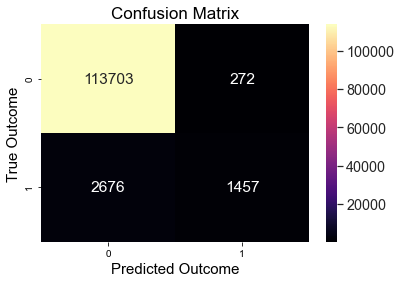

<Figure size 864x864 with 0 Axes>

              precision    recall  f1-score   support

           0       0.98      1.00      0.99    113975
           1       0.84      0.35      0.50      4133

    accuracy                           0.98    118108
   macro avg       0.91      0.68      0.74    118108
weighted avg       0.97      0.98      0.97    118108



In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = clf.predict(X_test_te)

# get the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

matrix_df = pd.DataFrame(confusion_matrix)

# set axis to add title and axis labels later
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(12,12))

plot = sns.heatmap(matrix_df, annot=True, fmt='g', ax=ax, cmap = "magma")

#axis labels and title
ax.set_title('Confusion Matrix', fontsize = 17)
ax.set_xlabel('Predicted Outcome', fontsize = 15)
ax.set_ylabel('True Outcome', fontsize = 15)

plt.show()


fig = plot.get_figure()

print(metrics.classification_report(y_test, y_pred))

### Tuning Hyperparameters
Next we can attempt to improve our Recall by fitting our model across a variety of hyperparameter values with Grid Search. We can then select upon the best fit to see how our overall performance changes.

In [19]:
from sklearn.model_selection import GridSearchCV

tuned_parameters = [{'criterion': ['gini','entropy'],
                     'min_samples_split': [2,3,4]}]

scores = ['recall']

for score in scores:
    
    print()
    print(f"Tuning hyperparameters for {score}")
    print()
    
    clf = GridSearchCV(
        RandomForestClassifier(n_estimators = 100, class_weight = 'balanced_subsample'), tuned_parameters,
        scoring = f'{score}'
    )
    clf.fit(X_train_te, y_train)
    
    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    means = clf.cv_results_["mean_test_score"]
    stds = clf.cv_results_["std_test_score"]
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print(f"{mean:0.3f} (+/-{std*2:0.03f}) for {params}")


Tuning hyperparameters for recall

Best parameters set found on development set:

{'criterion': 'entropy', 'min_samples_split': 4}

Grid scores on development set:
0.335 (+/-0.012) for {'criterion': 'gini', 'min_samples_split': 2}
0.361 (+/-0.015) for {'criterion': 'gini', 'min_samples_split': 3}
0.380 (+/-0.012) for {'criterion': 'gini', 'min_samples_split': 4}
0.350 (+/-0.010) for {'criterion': 'entropy', 'min_samples_split': 2}
0.371 (+/-0.016) for {'criterion': 'entropy', 'min_samples_split': 3}
0.389 (+/-0.012) for {'criterion': 'entropy', 'min_samples_split': 4}


In [20]:
#Creating a tuned classifier
clf_tuned = RandomForestClassifier(n_estimators = 100, 
                                   min_samples_split = clf.best_params_["min_samples_split"], 
                                   criterion = clf.best_params_['criterion'],
                                   class_weight = 'balanced_subsample',
                                   random_state = 23)

clf_tuned.fit(X_train_te, y_train)

RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       min_samples_split=4, random_state=23)

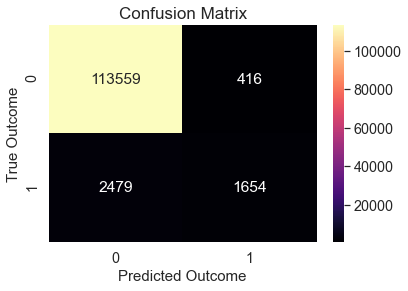

<Figure size 864x864 with 0 Axes>

              precision    recall  f1-score   support

           0       0.98      1.00      0.99    113975
           1       0.80      0.40      0.53      4133

    accuracy                           0.98    118108
   macro avg       0.89      0.70      0.76    118108
weighted avg       0.97      0.98      0.97    118108



In [21]:
y_pred_tuned = clf_tuned.predict(X_test_te)

# get the confusion matrix
confusion_matrix_tuned = metrics.confusion_matrix(y_test, y_pred_tuned)

matrix_df_tuned = pd.DataFrame(confusion_matrix_tuned)

# set axis to add title and axis labels later
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(12,12))

plot = sns.heatmap(matrix_df_tuned, annot=True, fmt='g', ax=ax, cmap = "magma")

#axis labels and title
ax.set_title('Confusion Matrix', fontsize = 17)
ax.set_xlabel('Predicted Outcome', fontsize = 15)
ax.set_ylabel('True Outcome', fontsize = 15)

plt.show()


fig = plot.get_figure()

print(metrics.classification_report(y_test, y_pred_tuned))

# Reevaluating

After tuning for min sample split and the criteria we judge a split by, we get a slightly better Recall of 39% at the cost of a slight decrease in Precision at 80%. This suggests that we still may have more potential growth in feature engineering though of course, if given more time we could explore more hyperparameter tuning as well. 